# Linear Regression
We start by creating a class that will handle the linear regression. As it can be seen by the fit() method, it uses Stochastic Gradient Descent in each epoch to fit the outputs. 

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

class LinearRegression():
    ALPHA = .001
    BATCH_SIZE = 20
    EPOCHES = 10000
    LAMBDA = .01
    def __init__(self, samples, targets):
        self.size, self.dimensions = samples.shape

        self.bias = 1
        self.w = np.asmatrix(np.zeros(self.dimensions)).transpose()
        self.fit(np.asmatrix(samples), np.asmatrix(targets).transpose(), self.dimensions)
        
    def fit(self, samples, targets, dimensions):
        for i in range(self.EPOCHES):
            seed = np.random.permutation(self.size)
            X = samples[seed]
            Y = targets[seed]

            s = random.randint(0,self.size-self.BATCH_SIZE)

            self.update_weights(X[s:s+self.BATCH_SIZE],Y[s:s+self.BATCH_SIZE])

    def update_weights(self, X, Y):
        hx = self.predict(X)
        
        loss =  X.transpose().dot(Y-hx) #/ self.size
        self.w += self.ALPHA * loss #- self.w * self.LAMBDA
        self.bias += self.ALPHA * np.sum(Y-hx) #/self.size

    def predict(self, X):
        return X.dot(self.w) + self.bias

    def test(self,data,target):
        total_size = len(data)
        mean_error = 0
        count = 0
        for i in range(total_size):
            y = target[i]
            yp = self.predict(data[i])[0,0]
            mean_error += abs(yp-y) / total_size
            if round(yp) == y:
                count+=1
            else:
                print(f"Predicted {yp} insted of {y}, difference is {round(abs(yp - y),2)}\tsample: {data[i]}")

        print(f"{count}/{total_size}, accuracy={round(count/(total_size)*100,2)}%, mean absolute error={round(mean_error,3)}")

    def __str__(self):
        return "h(x)="+"+".join([f"{round(self.w[i,0],2)}*x{i}" for i in range(self.dimensions)]) + "+"+str(round(self.bias,2))

    def plot_graph(self, samples, outputs):
        predictions = [self.predict(x)[0,0] for x in samples]
        samples_by_d = [ [x[i] for x in samples]for i in range(self.dimensions)]
        print(predictions, samples_by_d)

        for i in range(self.dimensions):
            x = np.linspace(min(samples_by_d[i]), max(samples_by_d[i]))
            w = self.w[i,0]
            plt.plot(x,w*x+self.bias, "-r", label=f"w[{i}]")
            plt.scatter(samples_by_d[i],outputs)
            plt.legend(loc='upper left')
            plt.grid()
            plt.show()

            

def random_permutation(size, *arrays):
    seed = np.random.permutation(size)
    ret = list()

    for a in arrays:
        ret.append(a[seed])
    
    return tuple(ret)

Now we can import the dataset and start training the model. We divide the dataset into training and testing

In [3]:
from sklearn.datasets import load_iris

dataset = load_iris()
total_size = len(dataset.data)
TRAINING_RATIO = .334
training_size = int(total_size * TRAINING_RATIO)

data, target = random_permutation(total_size, dataset.data, dataset.target)
LR = LinearRegression(data[:training_size], target[:training_size])

print(LR)

h(x)=-0.02*x0+-0.23*x1+0.14*x2+0.68*x3+0.43


We can than test the model on the training set

In [4]:
LR.test(data[training_size:], target[training_size:])

Predicted 1.4545383002371777 insted of 2, difference is 0.55	sample: [6.1 2.6 5.6 1.4]
Predicted 1.4023501341492373 insted of 2, difference is 0.6	sample: [6.3 2.8 5.1 1.5]
Predicted 1.5000866738382532 insted of 1, difference is 0.5	sample: [6.  2.7 5.1 1.6]
97/100, accuracy=97.0%, mean absolute error=0.191


And, although we can't draw a 4D function, we could try to visualize the linear model on each dimension

[-0.06488711188174423, -0.017998241328509024, 1.3275711833313553, 1.868351543010045, -0.31324893680841137, 1.5321633890678314, 1.1371526722249636, 0.9526334928510073, -0.025410066593601344, 1.7745077442601942, 1.9604004494080005, 1.7312054724741612, 1.7307772534240704, 1.4707785437715377, -0.08540989090951723, -0.18239593143546873, 2.0482673635755075, 1.2997425179756061, 0.14920645843715546, 1.930075559299993, 1.7096544381985672, -0.005643886261269271, 1.1448537487813395, -0.10159557200702407, 1.570316828284494, -0.04229632715180276, 1.0458212361683823, -0.08677192147683943, 0.023257558370518516, 1.6238110057050106, 1.1763074374001323, 1.9498363439581738, 1.2867321074758902, -0.12348038160211938, 0.9713545270548399, 1.4821491676191756, -0.14428091671464804, 2.015345705452276, -0.04445338091040796, -0.08111731700746949, -0.028896122097838317, -0.30198425189788936, 0.045859838306987866, 1.7327792014828578, 1.0454605315595662, 1.0369698274860588, 1.7096544381985672, -0.039144046967067914,

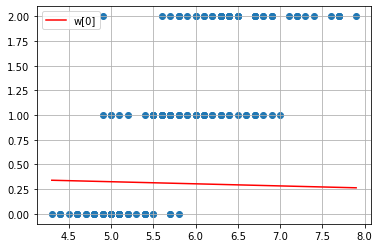

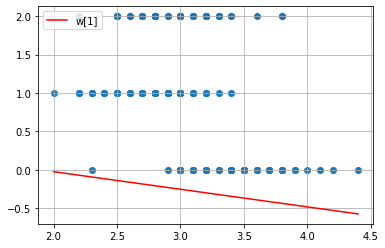

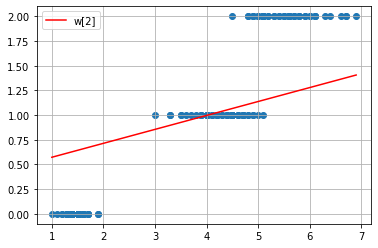

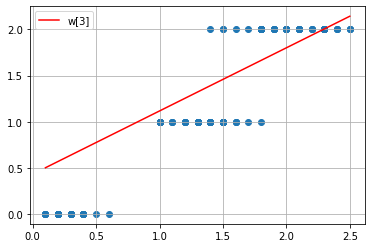

In [5]:
LR.plot_graph(data, target)

#Logistic Regression


In [6]:
class LogisticRegression:
    ALPHA = 0.01
    BATCH_SIZE = 20
    EPOCHES = 1000
    def __init__(self, samples, targets):
        self.size, self.dimensions = samples.shape

        self.w = np.asmatrix(np.zeros(self.dimensions)).transpose()
        self.fit(np.asmatrix(samples), np.asmatrix(targets).transpose())

    def fit(self, samples, outputs):
        for i in range(self.EPOCHES):
            sgd = [random.randint(0, self.size-1) for _ in range(self.BATCH_SIZE)]
            X = samples[sgd]
            Y = outputs[sgd]

            self.update_weights(X, Y)

    def update_weights(self, X, Y):
        # print(self.h(X))
        gradient =  np.dot(X.T, (Y-self.sigmoid(self.h(X)))) / Y.shape[0]
        # print(gradient)
        self.w += self.ALPHA * gradient
        # for i in range(len(X)):
        #     x = X[i]
        #     y = Y[i]

        #     hx = self.predict(x)
        #     # print(self.w, x.T, hx-y)
        #     # binary cross entropy loss
        #     self.w += self.ALPHA * (y - hx)[0,0] * x.T

    def predict(self, x):
        return self.sigmoid(self.h(x))[0,0]

    def h(self, X):
        return np.dot(X, self.w)

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def test(self,data,target):
        total_size = len(data)
        mean_error = 0
        count = 0
        for i in range(total_size):
            y = target[i]
            yp = self.predict(data[i])
            mean_error += abs(yp-y) / total_size
            if round(yp) == y:
                count+=1
            else:
                print(f"Predicted {yp} insted of {y}, difference is {round(abs(yp - y),2)}\tsample: {data[i]}")

        print(f"{count}/{total_size}, accuracy={round(count/(total_size)*100,2)}%, mean absolute error={round(mean_error,3)}")

    def __str__(self):
        return "h(x)=Logistic("+" + ".join([f"{round(self.w[i,0],2)}*x{i}" for i in range(self.dimensions)]) +")"


Testing the LogReg:


In [10]:
target_log = list(map(lambda x: 1 if x==2 else 0, target))
LogReg = LogisticRegression(data[:training_size], target_log[:training_size])
LogReg.test(data[training_size:], target_log[training_size:])
print(LogReg)

Predicted 0.5488030166859803 insted of 0, difference is 0.55	sample: [5.5 2.6 4.4 1.2]
Predicted 0.5227735355428309 insted of 0, difference is 0.52	sample: [5.7 2.8 4.5 1.3]
Predicted 0.6426947167466663 insted of 0, difference is 0.64	sample: [6.3 2.5 4.9 1.5]
Predicted 0.5113275007639051 insted of 0, difference is 0.51	sample: [6.3 2.3 4.4 1.3]
Predicted 0.565969669637578 insted of 0, difference is 0.57	sample: [5.4 3.  4.5 1.5]
Predicted 0.7110790631703109 insted of 0, difference is 0.71	sample: [6.  2.7 5.1 1.6]
Predicted 0.6147378596760209 insted of 0, difference is 0.61	sample: [6.2 2.2 4.5 1.5]
Predicted 0.5239952299954361 insted of 0, difference is 0.52	sample: [5.5 2.3 4.  1.3]
Predicted 0.5151414904583449 insted of 0, difference is 0.52	sample: [6.1 2.9 4.7 1.4]
91/100, accuracy=91.0%, mean absolute error=0.247
h(x)=Logistic(-0.62*x0 + -0.87*x1 + 1.1*x2 + 0.82*x3)
